In [1]:
#Importamos las librerias necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom
%matplotlib inline

In [7]:
#Leer imagen
#Carga la imagen en la variable ima utlizando la funcion de OpenCV
ima=cv2.imread('imagencelula.jpg')

#Dimensiones de la imagen utilizando funciones de Numpy
row, col, chn=np.shape(ima)
print('Filas    ', row)
print('Columnas ', col)
print('Canales  ', chn)

gris = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY) #Se onvierte la imagen a escala de grises 
_, binarizada = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #Se binariza la imagen de acuerdo con el umbral optimo invirtiendo los valores d elos pixeles para resaltar las celulas
kernel = np.ones((3,3), np.uint8) #Se define un kernel(3x3) con todos sus elementos igual a 1 para las operaciones de erosión y dilatación 
erosion = cv2.erode(binarizada, kernel, iterations = 1) #Se realiza la erosión que se utiliza para reducir el tamaño de los objetos blancos en la imagen binarizada
dilatacion = cv2.dilate(erosion, kernel, iterations = 1) #Se realiza la dilatación en la imagen erosionada para aumentar el tamaño de los objetos blancos en la imagen para unir regiones separadas y sea mas facil identificar las células
contornos, _ = cv2.findContours(dilatacion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Se encuentran los contornos externos y se aproximan para reducir su número de puntps
numero_celulas = len(contornos) #Se calcula en número de contornos encontrados que vienen siendo el numero de celulas en la imagen
print("----------------------------------------------")
print("Número de células encontradas:", numero_celulas)
print("----------------------------------------------")


Filas     720
Columnas  960
Canales   3
----------------------------------------------
Número de células encontradas: 125
----------------------------------------------


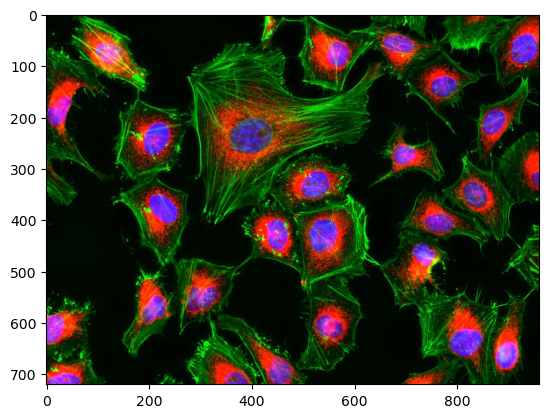

In [6]:
#convierte la imagen ima del espacio de color BGR (Blue, Green, Red) al espacio de color RGB (Red, Green, Blue). 
#Esto es necesario porque OpenCV lee las imágenes en formato BGR por defecto, pero matplotlib espera que las imágenes estén en formato RGB para mostrarlas correctamente.
imap=cv2.cvtColor(ima,cv2.COLOR_BGR2RGB)
plt.imshow(imap) #grafica por defecto
plt.show()